## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

Importing required modules: 

In [1]:
# Import required modules 
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle 
%matplotlib inline

## Camera calibration using chessboard images

In [3]:
# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        # img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        # cv2.imshow('img',img)
        # cv2.waitKey(500)

#cv2.destroyAllWindows()

#print(len(imgpoints)) # to check how many images the corners were detected on

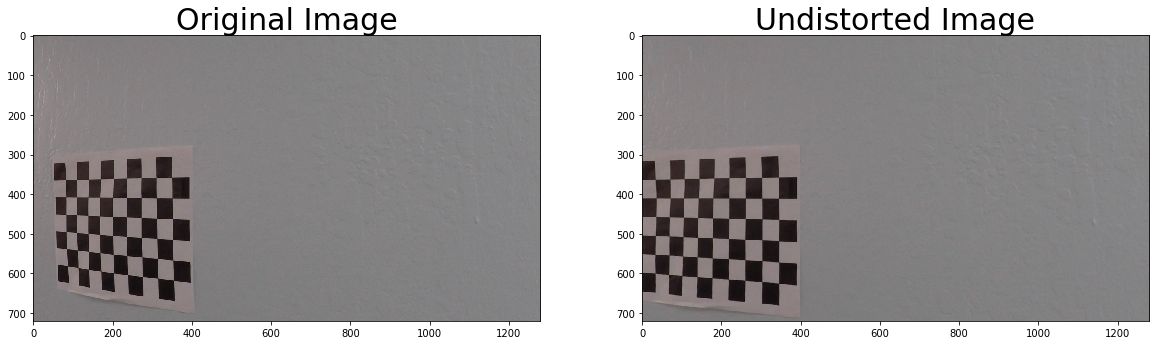

In [6]:
# Read in the test image 
img = cv2.imread('camera_cal/test.jpg')
img_size = (img.shape[1], img.shape[0])

# Calibrate camera with the above object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/mtx_dist_pickle.p", "wb" ) )

# Test undistortion on the test image
dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('camera_cal/test_undist.jpg',dst)

#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

## Distortion correction applied to each of the 6 test images

In [2]:
# Load previously computed camera matrix and distortion coefficients 
with open('camera_cal/mtx_dist_pickle.p', 'rb') as f:
    mtx_dist = pickle.load(f)

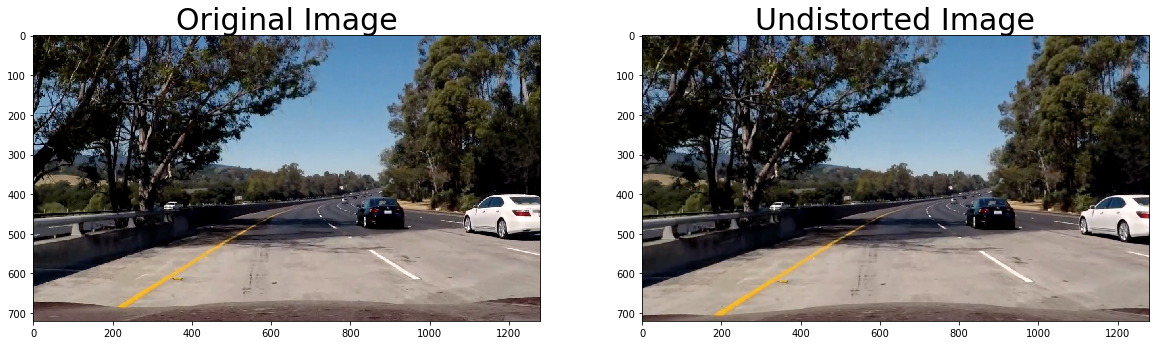

In [10]:
# Load and undistort the image
img = plt.imread('test_images/test5.jpg')

undistorted = cv2.undistort(img, mtx_dist['mtx'], mtx_dist['dist'], None, mtx_dist['mtx'])
cv2.imwrite('test_images/undistorted_test5.jpg', undistorted)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=30)

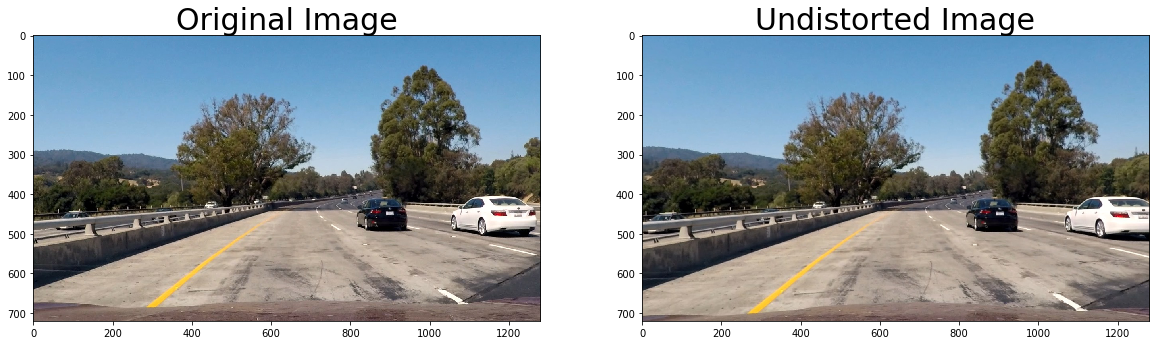

In [11]:
# Load and undistort the image
img = plt.imread('test_images/test1.jpg')

undistorted = cv2.undistort(img, mtx_dist['mtx'], mtx_dist['dist'], None, mtx_dist['mtx'])
cv2.imwrite('test_images/undistorted_test1.jpg', undistorted)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=30)

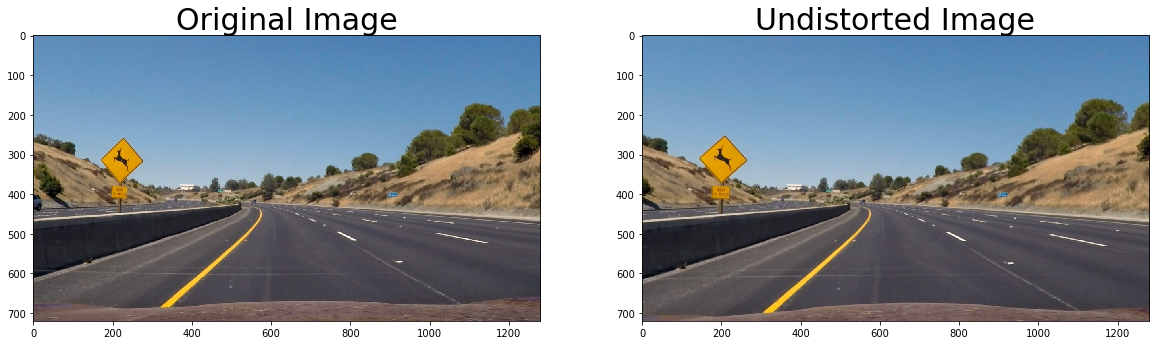

In [12]:
# Load and undistort the image
img = plt.imread('test_images/test2.jpg')

undistorted = cv2.undistort(img, mtx_dist['mtx'], mtx_dist['dist'], None, mtx_dist['mtx'])
cv2.imwrite('test_images/undistorted_test2.jpg', undistorted)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=30)

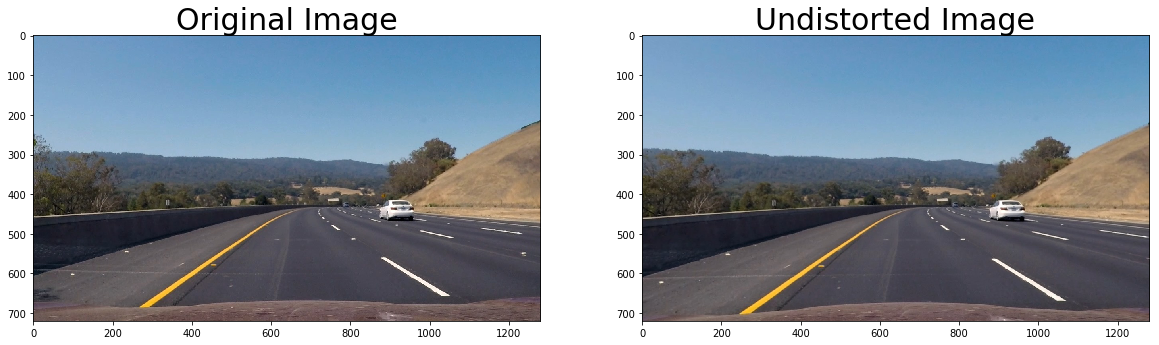

In [13]:
# Load and undistort the image
img = plt.imread('test_images/test3.jpg')

undistorted = cv2.undistort(img, mtx_dist['mtx'], mtx_dist['dist'], None, mtx_dist['mtx'])
cv2.imwrite('test_images/undistorted_test3.jpg', undistorted)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=30)

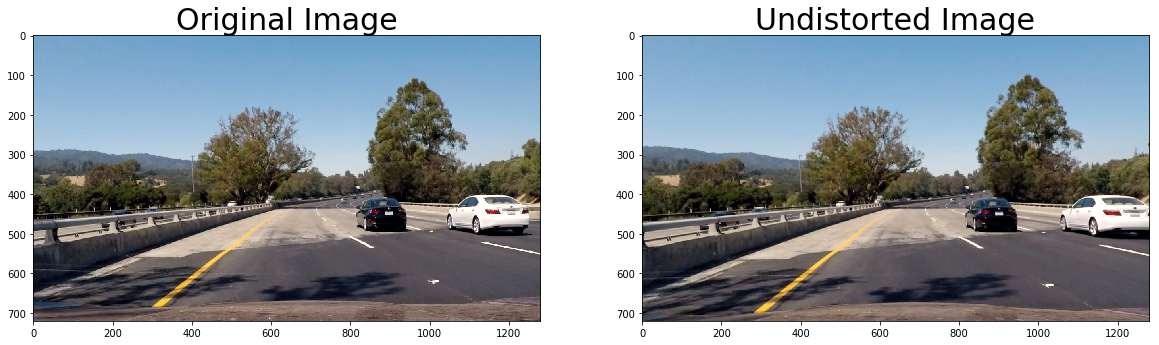

In [14]:
# Load and undistort the image
img = plt.imread('test_images/test4.jpg')

undistorted = cv2.undistort(img, mtx_dist['mtx'], mtx_dist['dist'], None, mtx_dist['mtx'])
cv2.imwrite('test_images/undistorted_test4.jpg', undistorted)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=30)

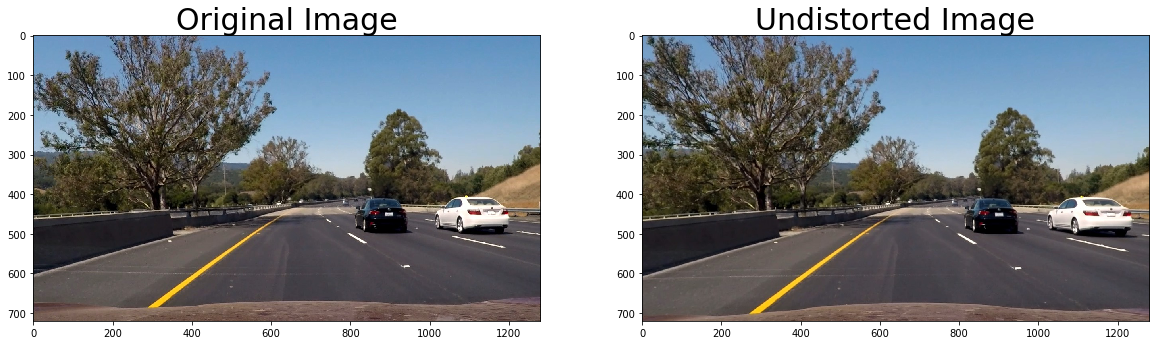

In [15]:
# Load and undistort the image
img = plt.imread('test_images/test6.jpg')

undistorted = cv2.undistort(img, mtx_dist['mtx'], mtx_dist['dist'], None, mtx_dist['mtx'])
cv2.imwrite('test_images/undistorted_test6.jpg', undistorted)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=30)

## Combining undistortion and color and gradient thresholding 

In [104]:
# Define a function which combines gradient (Sobel x) and 
# color thresholding and yields a 3-channel image with different colors for 
# Sobel x and color channel thresholded points 
def pipeline(img, r_thresh=(230, 255), s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    r_channel = img[:,:,0]
    # Convert to HSV color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel s
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    # Threshold color channel r
    r_binary = np.zeros_like(r_channel)
    r_binary[(r_channel >= r_thresh[0]) & (r_channel <= r_thresh[1])] = 1
    
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack((r_binary, sxbinary, s_binary))
    return color_binary

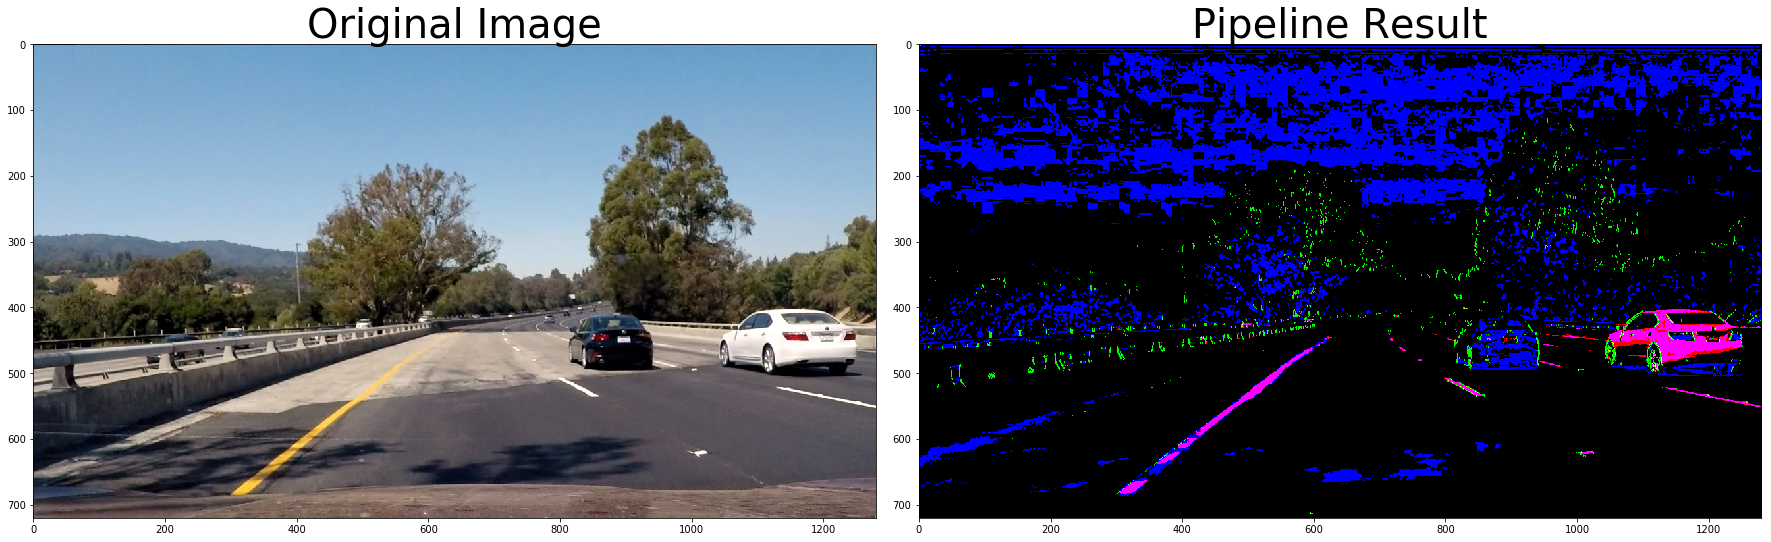

In [105]:
# Read in an image and and apply to it the combined
# Sobel x and S-channel thresholding 
image = plt.imread('test_images/test4.jpg')

result = pipeline(image, s_thresh=(120, 255), sx_thresh=(60, 200))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
# cv2.imwrite('test_images/test6_s_and_sobel_thresholded.jpg', result)

## Perspective transform

In [3]:
# Define coordinates of the source and destination images
# done manually for the source image
src = np.float32([[609, 437], [669, 437], [351, 621], [954, 621]])
dst = np.float32([[300, 0], [1000, 0], [300, 720], [1000, 720]])
# Extract perspective transform parameters 
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)

In [5]:
# Read in the image and get its dimensions 
image = plt.imread('test_images/straight_lines2.jpg')
image_dimensions = (image.shape[1], image.shape[0])

# Undistort the image
undistorted = cv2.undistort(image, mtx_dist['mtx'], mtx_dist['dist'], None, mtx_dist['mtx'])
cv2.imwrite('test_images/straight_lines2_undistorted.jpg', undistorted)

# Get warped image
warped = cv2.warpPerspective(undistorted, M, image_dimensions)
cv2.imwrite('test_images/straight_lines2_warped.jpg', warped)

True

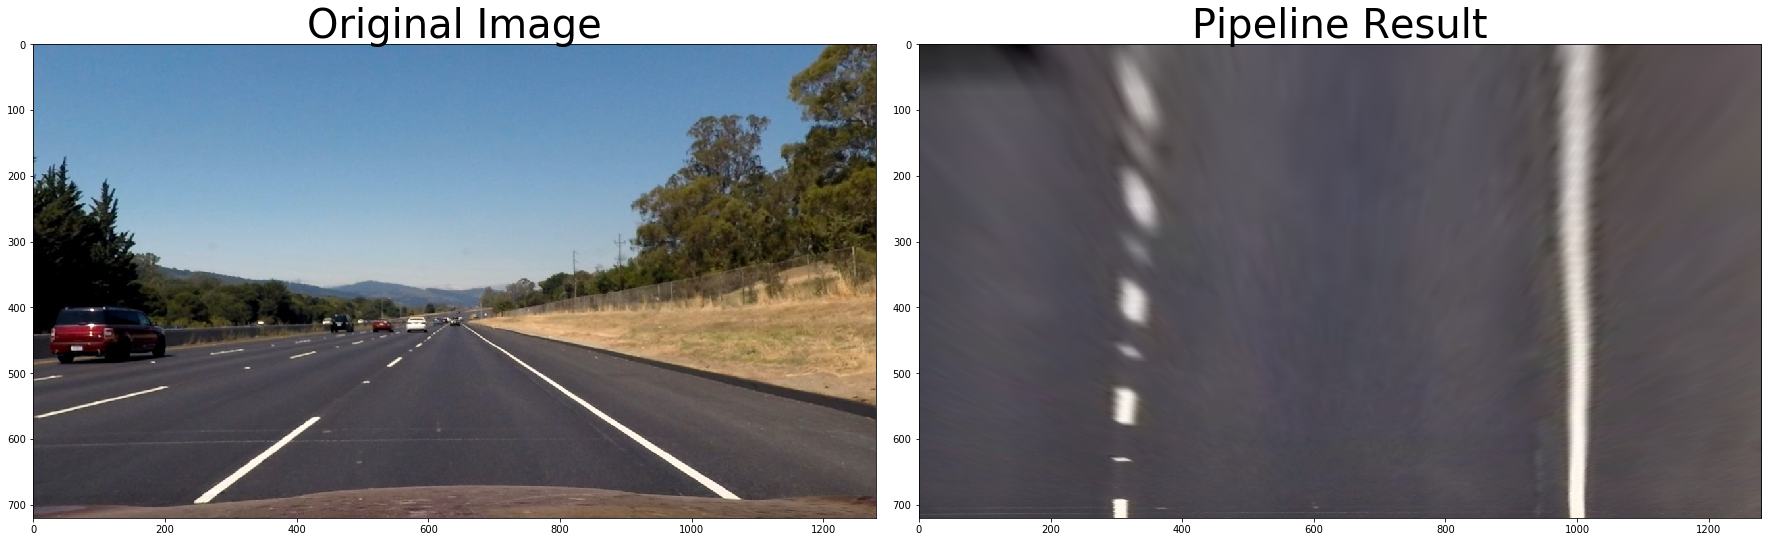

In [7]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(undistorted)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(warped)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Identifying and fitting lane line pixels

In [11]:
# Define a function which combines gradient (Sobel x) and 
# color (single "S" saturation channel) thresholding and 
# yields a 2-D image with combined effect of Sobel x 
# and S channel thresholding  
def pipeline_combined(img, r_thresh=(230, 255), s_thresh=(170, 255), l_thresh=(200, 255), h_thresh=(200, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Retrieve R channel
    r_channel = img[:,:,0]
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hsv[:,:,1]
    h_channel = hsv[:,:,0]
    s_channel = hsv[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel r
    r_binary = np.zeros_like(r_channel)
    r_binary[(r_channel >= r_thresh[0]) & (r_channel <= r_thresh[1])] = 1
    
    # Threshold color channel s
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    # Threshold color channel l
    l_binary = np.zeros_like(l_channel)
    l_binary[(l_channel >= l_thresh[0]) & (l_channel <= l_thresh[1])] = 1
    
    # Threshold color channel h
    h_binary = np.zeros_like(h_channel)
    h_binary[(h_channel >= h_thresh[0]) & (h_channel <= h_thresh[1])] = 1
    
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    combined_binary = np.zeros_like(scaled_sobel)
    combined_binary[ (sxbinary == 1) | (s_binary == 1) | (r_binary == 1) | (l_binary == 1) | (h_binary == 1)] = 1
    return combined_binary

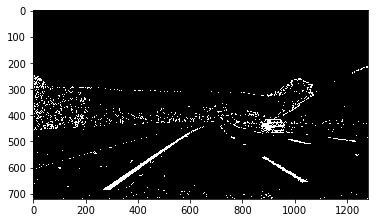

In [12]:
# Test the pipeline_combined function
test_image = plt.imread('test_images/test3.jpg')
test = pipeline_combined(test_image)
plt.imshow(test, cmap='gray')
# cv2.imwrite('test_images/test3_s_and_sobel_thresholded.jpg', test)

In [13]:
# Define a procedure for undistorting, color and gradient thresholding
# and perspective transform
def undist_thresh_persptr(image, mtx, dist, src, dst):
    undist = cv2.undistort(image, mtx, dist, None, mtx)
    thresholded = pipeline_combined(image)
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(thresholded, M, (image.shape[1], image.shape[0]))
    return warped 

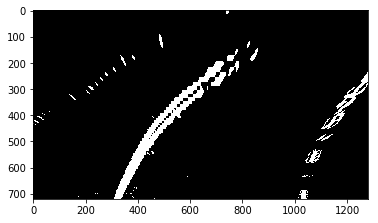

In [22]:
binary_warped = undist_thresh_persptr(test_image, mtx_dist['mtx'], mtx_dist['dist'], src, dst)
plt.imshow(binary_warped, cmap='gray')

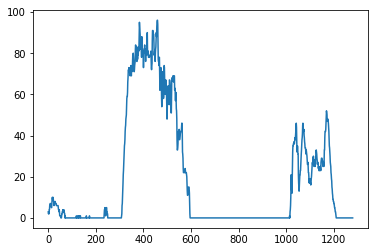

In [23]:
histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)
plt.plot(histogram)

In [24]:
# Prepare a matrix for displaying an image subsequently 
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint 

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

(720, 0)

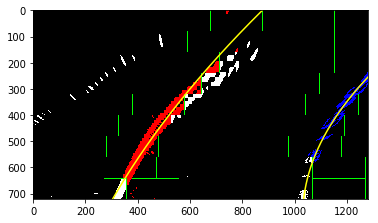

In [25]:
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

## Determining the lane line curvature and the position of the vehicle with respect to center in the lane

In [26]:
# Determine lane line curature in pixel values 
y_eval = binary_warped.shape[0] # Set the position to evaluate the curvature at
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)

2543.84233083 572.64319974


In [27]:
# Determing lane line curvature in real world, meter, values

# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)

# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')

547.934342913 m 184.561282639 m


In [28]:
# Determining the position of the vehicle with respect to the center of the lane
# and creating a summary caption with curvature and distance

left_lane_bottom = left_fit[0]*y_eval**2 + left_fit[1]*y_eval + left_fit[2]
right_lane_bottom = right_fit[0]*y_eval**2 + right_fit[1]*y_eval + right_fit[2]
lane_center = left_lane_bottom + (right_lane_bottom - left_lane_bottom) / 2 
distance = binary_warped.shape[1]/2 - lane_center
real_distance = distance * xm_per_pix

av_curve = (left_curverad + right_curverad) / 2
curve_caption = 'Lane curvature ' + str(round(av_curve)) + 'm'
if real_distance <=0:
    dist_caption = 'Vehicle ' + str(abs(round(real_distance,3))) + 'm left of center'
else:
    dist_caption = 'Vehicle ' + str(abs(round(real_distance,3))) + 'm right of center'
caption = curve_caption + '; ' + dist_caption
caption

'Lane curvature 366.0m; Vehicle 0.157m left of center'

## Displaying the identified lanes, curvature and vehicle position back onto the original image 

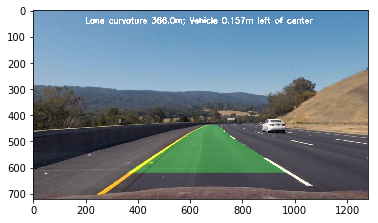

In [29]:
# Create an image to draw the lines on
warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (test_image.shape[1], test_image.shape[0]))

# Combine the result with the original image
result = cv2.addWeighted(cv2.undistort(test_image, mtx_dist['mtx'], mtx_dist['dist'], None, mtx_dist['mtx']), 1, newwarp, 0.3, 0)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(result, caption, (200, 50), font, 1, (255, 255, 255), 3)
plt.imshow(result)
#plt.text(50, 50, caption, style='italic', bbox={'facecolor':'red', 'alpha':0., 'pad':10})

## Video processing pipeline

In [8]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [14]:
# Define a NEW procedure which pipelines all the above steps and avoids blind search 

smoothing = 4 # The number of latest polynomials to average on
max_diff = 5 # To compare subsequent polynomial coefficients 

line_tracker = [] # List of tuples to store polynomial fit coefficients 

def process_image_new(img, mtx=mtx_dist['mtx'], dist=mtx_dist['dist'], src=src, dst=dst):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here  
    binary_warped = undist_thresh_persptr(img, mtx, dist, src, dst)
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    if len(line_tracker) <= smoothing:
        histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)
        midpoint = np.int(histogram.shape[0]/2)
        leftx_base = np.argmax(histogram[:midpoint])
        rightx_base = np.argmax(histogram[midpoint:]) + midpoint 
        # Choose the number of sliding windows
        nwindows = 9
        # Set height of windows
        window_height = np.int(binary_warped.shape[0]/nwindows)
        
        # Current positions to be updated for each window
        leftx_current = leftx_base
        rightx_current = rightx_base
        # Set the width of the windows +/- margin
        margin = 100
        # Set minimum number of pixels found to recenter window
        minpix = 50
        # Create empty lists to receive left and right lane pixel indices
        left_lane_inds = []
        right_lane_inds = []

        # Step through the windows one by one
        for window in range(nwindows):
            # Identify window boundaries in x and y (and right and left)
            win_y_low = binary_warped.shape[0] - (window+1)*window_height
            win_y_high = binary_warped.shape[0] - window*window_height
            win_xleft_low = leftx_current - margin
            win_xleft_high = leftx_current + margin
            win_xright_low = rightx_current - margin
            win_xright_high = rightx_current + margin

            # Identify the nonzero pixels in x and y within the window
            good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
            good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
            # Append these indices to the lists
            left_lane_inds.append(good_left_inds)
            right_lane_inds.append(good_right_inds)
            # If you found > minpix pixels, recenter next window on their mean position
            if len(good_left_inds) > minpix:
                leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
            if len(good_right_inds) > minpix:        
                rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

        # Concatenate the arrays of indices
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)

        # Extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds] 

        # Fit a second order polynomial to each
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        line_tracker.append((left_fit, right_fit))
    else:     
        margin = 30
        latest_fits = np.array(line_tracker[-smoothing:]) # Latest so many fits
        av_coeffs = latest_fits.mean(axis=0) # Average fit values over the latest fits
        left_lane_inds = ((nonzerox > (av_coeffs[0][0]*(nonzeroy**2) + av_coeffs[0][1]*nonzeroy + av_coeffs[0][2] - margin)) & (nonzerox < (av_coeffs[0][0]*(nonzeroy**2) + av_coeffs[0][1]*nonzeroy + av_coeffs[0][2] + margin))) 
        right_lane_inds = ((nonzerox > (av_coeffs[1][0]*(nonzeroy**2) + av_coeffs[1][1]*nonzeroy + av_coeffs[1][2] - margin)) & (nonzerox < (av_coeffs[1][0]*(nonzeroy**2) + av_coeffs[1][1]*nonzeroy + av_coeffs[1][2] + margin))) 
        # Again, extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]
        # Fit a second order polynomial to each
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)  
        ##### If subsequent polynomial coefficients too different, revert to previous one 
        if (sum(abs(left_fit-line_tracker[-1][0])[:-1]) > max_diff) | (sum(abs(right_fit-line_tracker[-1][1])[:-1]) > max_diff):
            left_fit = line_tracker[-1][0]
            rigth_fit = line_tracker[-1][1]
        else:
            pass    
        #####
        line_tracker.append((left_fit, right_fit))
        
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0]))

    # Combine the result with the original image
    result = cv2.addWeighted(cv2.undistort(img, mtx, dist, None, mtx), 1, newwarp, 0.3, 0)
    
    
    # Calculating lane curvature and vehicle position and putting the caption of video frames
    y_eval = binary_warped.shape[0] # Set the position to evaluate the curvature at
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    av_curve = (left_curverad + right_curverad) / 2
    curve_caption = 'Lane curvature ' + str(round(av_curve)) + 'm'
    
    left_lane_bottom = left_fit[0]*y_eval**2 + left_fit[1]*y_eval + left_fit[2]
    right_lane_bottom = right_fit[0]*y_eval**2 + right_fit[1]*y_eval + right_fit[2]
    lane_center = left_lane_bottom + (right_lane_bottom - left_lane_bottom) / 2 
    distance = binary_warped.shape[1]/2 - lane_center
    real_distance = distance * xm_per_pix
    if real_distance <=0:
        dist_caption = 'Vehicle ' + str(abs(round(real_distance,3))) + 'm left of center'
    else:
        dist_caption = 'Vehicle ' + str(abs(round(real_distance,3))) + 'm right of center'
    caption = curve_caption + '; ' + dist_caption
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(result, caption, (200, 50), font, 1, (255, 255, 255), 3)

    return result

In [15]:
output_video = 'output_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
basic_clip = clip1.fl_image(process_image_new) #NOTE: this function expects color images!!
%time basic_clip.write_videofile(output_video, audio=False)

[MoviePy] >>>> Building video output_video.mp4
[MoviePy] Writing video output_video.mp4


100%|█████████▉| 1260/1261 [06:26<00:00,  3.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video.mp4 

CPU times: user 4min 6s, sys: 20.4 s, total: 4min 26s
Wall time: 6min 29s


In [75]:
# To play video in the notebook
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_video))